# ***WEATHER DATASET ANALYSIS***

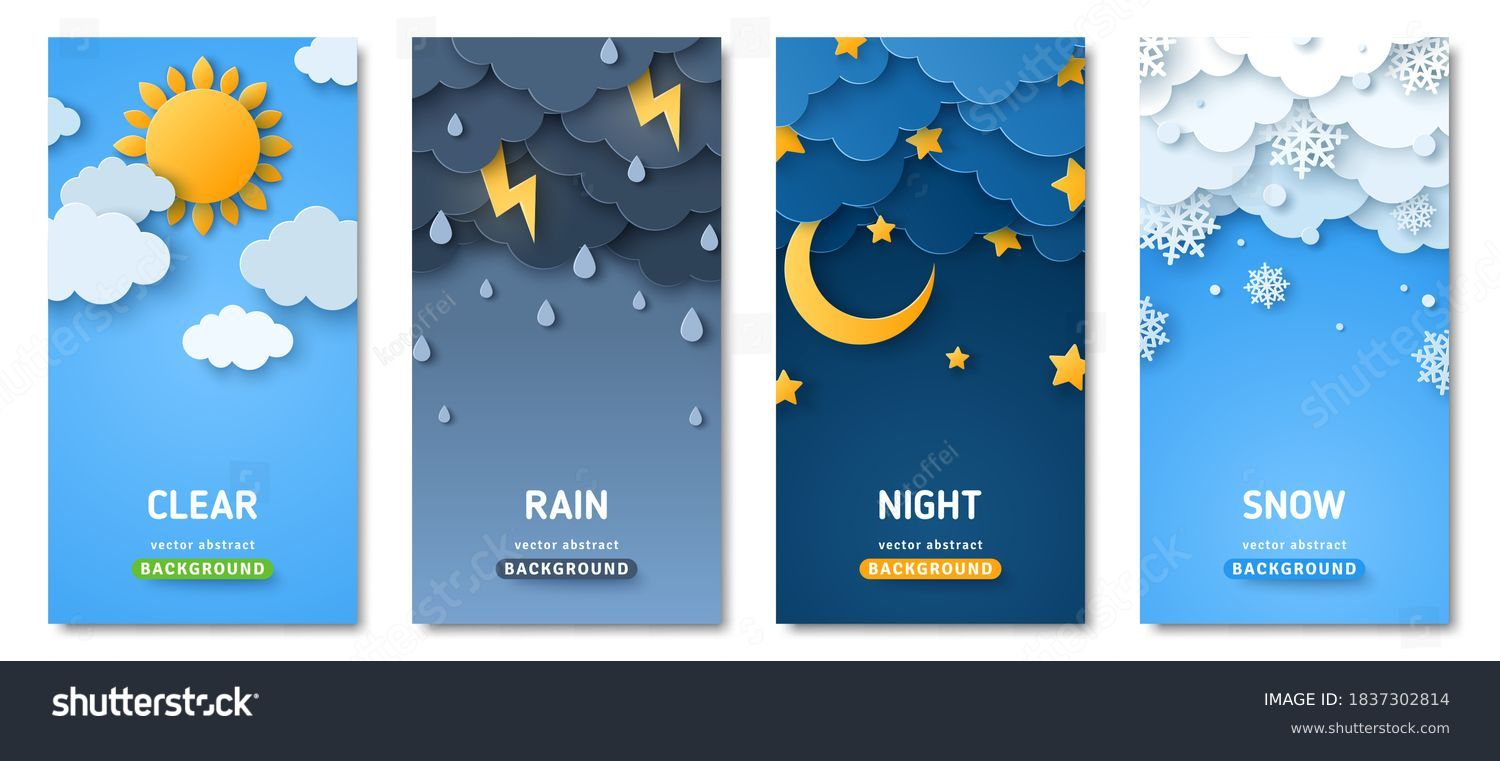

In [1]:
from IPython.display import Image
img = "weather_image.jpg"
Image(img)

### Source -> kaggle.com

# ***1.Introduction***

## -**Objective**
The objective of this analysis is to understand and model weather patterns using the provided dataset. The aim to explore relationships between weather variables, clean and preprocess the data, and perform regression analysis to gain insights into how different weather attributes impact precipitation.


## -**Dataset Overview**

### ****About Weather Dataset****
The dataset includes various weather attributes recorded over a period. Specifically, it contains data on precipitation, temperature, wind speed, and weather conditions.

### ****Input Variables****
1. Date
2. Precipitation
3. Temp_max(Maximum Temperature)
4. Temp_min(Minimum Temperature)
5. Wind(Wind Speed)
6. Weather(Weather Conditions)
   - drizzle
   - fog
   - rain
   - snow
   - sun
     
-> Number of varibles - 5 (Precipitation, Temp_max, Temp_min, Wind, Weather)


# ***2.Data Import and Exploration:***

## -**Import Libraries:**
1. ***Pandas*** - Provides data structures and functions for efficient data manipulation and analysis.
2. ***Numpy*** - Supports numerical operations and efficient array handling.
3. ***Matplotlib.pyplot*** - Enables creation of static, interactive, and animated visualizations in Python
4. ***Seaborn***  - Simplifies the creation of informative and attractive statistical graphics based on Matplotlib.

In [2]:
# import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## -**Read Dataset** :

In [3]:
# Read Dataset

data = pd.read_csv("weather_.csv")

## -**Head and Tail :**
1. ***Head*** - Shows the first few rows of the DataFrame.
2. ***Tail*** - Displays the last few rows of the DataFrame.

In [4]:
# Head

data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [5]:
# Tail

data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,27-12-2015,8.6,4.4,1.7,2.9,rain
1457,28-12-2015,1.5,5.0,1.7,1.3,rain
1458,29-12-2015,0.0,7.2,0.6,2.6,fog
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun
1460,31-12-2015,NaN,5.6,-2.1,3.5,sun


# ***3.Sanity Check of Data***
 - To ensure the dataset is accurate and reliable by identifying and addressing errors, inconsistencies, and anomalies before further analysis.

## -**Naming the Columns as given in dataset :**

In [6]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

**The `data.columns` output reveals that the dataset has 6 columns:**

1. ***date*** --> **The date of the weather observation.**
2. ***precipitation*** --> **The amount of precipitation recorded.**
3. ***temp_max*** --> **The maximum temperature recorded.**
4. ***temp_min*** -->  **The minimum temperature recorded.**
5. ***wind*** --> **The wind speed recorded.**
6. ***weather*** --> **The weather condition (e.g., drizzle, fog, rain, snow, sun).**

## -**Removing date Column :**
 - To eliminate non-essential information that does not contribute to the analysis of weather conditions, simplifying the dataset for further processing and analysis.

In [7]:
# drop date (unneccessary column in dataset)

data=data.drop(columns=['date'])

In [8]:
data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

## -**Shape :**
 - To determine the dimensions of the dataset, including the number of rows and columns, which helps in understanding its structure and ensuring it aligns with expectations.

In [9]:
# Shape

data.shape

(1461, 5)

**The `data.shape` output indicates that the dataset has 1461 rows and 5 columns.**

## -**Info :**
 - To provide a summary of the dataset's structure, including data types, non-null counts, and column names, which helps in assessing data quality and preparing for analysis.

In [10]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1445 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1449 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


- **The `data.info()` output reveals that the dataset is a Pandas DataFrame with 1461 entries, indexed from 0 to 1460.**
- **It contains 5 columns: `precipitation`, `temp_max`, `temp_min`, `wind`, and `weather`.**
- **The `precipitation` column has 1445 non-null entries, while `temp_max`, `wind`, and `weather` columns have 1461 non-null entries. The `temp_min` column has 1449 non-null entries.**
- **The first four columns (`precipitation`, `temp_max`, `temp_min`, `wind`) are of type `float64`, representing numerical data.**
- **The `weather` column is of type `object`, indicating categorical weather conditions.**
- **The dataset's memory usage is approximately 57.2 KB.**

# ***4.Finding Missing Values***

## **-Missing values**
 - To identify and assess missing data in the dataset, which is crucial for ensuring data completeness and accuracy before proceeding with analysis.


In [11]:
# Finding missing values

data.isnull().sum()

precipitation    16
temp_max          0
temp_min         12
wind              0
weather           0
dtype: int64

- ***`precipitation`*** --> **16 missing values**
- ***`temp_max`*** --> **No missing values**
- ***`temp_min`*** --> **12 missing values**
- ***`wind`*** --> **No missing values**
- ***`weather`*** --> **No missing values**

**The dataset has missing values in the `precipitation` and `temp_min` columns.**

In [12]:
# Percentage of missing values

data.isnull().sum()/data.shape[0]

precipitation    0.010951
temp_max         0.000000
temp_min         0.008214
wind             0.000000
weather          0.000000
dtype: float64

- ***`precipitation`*** -->  **1.10%**
- ***`temp_max`*** -->  **0.00%**
- ***`temp_min`***  --> **0.82%**
- ***`wind`*** --> **0.00%**
- ***`weather`*** --> **0.00%**

**The dataset has a small percentage of missing values in the `precipitation` and `temp_min` columns.**

# ***5.Exploratory Data Analysis (EDA)***
 -  To perform a preliminary examination of the dataset, identifying key patterns and basic statistics to understand its structure and content.

## **Investigating the data**

## - **Descriptive Statistics for numeric values**
 - Provides a summary of key statistical measures such as mean, median, standard deviation, and range for numeric data, helping to understand the distribution and variability of the dataset.

In [13]:
# Descriptive Statistics for numeric values

data.describe()

,precipitation,temp_max,temp_min,wind
count,1445.000000,1461.000000,1449.000000,1461.000000
mean,3.031003,25.547023,8.257281,21.995551
std,6.680389,270.073401,5.023279,634.189998
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,10000.000000,18.300000,24007.000000


**The `data.describe()` output provides statistical summary of the numerical columns in the dataset:**

- **`precipitation`**:
  - Mean: 3.03
  - Std Dev: 6.68
  - Min: 0.00
  - Max: 55.90

- **`temp_max`**:
  - Mean: 25.55
  - Std Dev: 270.07
  - Min: -1.60
  - Max: 10000.00

- **`temp_min`**:
  - Mean: 8.26
  - Std Dev: 5.02
  - Min: -7.10
  - Max: 18.30

- **`wind`**:
  - Mean: 22.00
  - Std Dev: 634.19
  - Min: 0.40
  - Max: 24007.00

**This summary provides an overview of the central tendency, spread, and range of the numerical variables in the dataset.**

## -**Descriptive Statistics for object values**
 -  Provides insights into the frequency and distribution of categorical data, including counts and unique values, helping to understand the composition and diversity of the dataset.


In [14]:
# Descriptive Statistics for object values

data.describe(include="object")

,weather
count,1461
unique,5
top,rain
freq,641


**The `data.describe(include="object")` output provides a summary of the categorical column **`Weather`**:**

  - ***`Count`*** -->  **1461**
  - ***`Unique Values`*** -->  **5**
  - ***`Most Common Value (Top)`*** --> **rain**`
  - ***`Frequency of Most Common Value`*** -->  **641**

**This summary provides an overview of the categorical distribution in the `weather` column, showing the most common weather condition and its frequency.**

#### ****-Unique Values****
 -  To identify all distinct values in a categorical dataset, which helps in understanding the diversity and variability of the categorical features.

In [15]:
# Weather unique values

data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

**The `weather` column contains unique values:**

- ***`drizzle`***
- ***`rain`***
- ***`sun`***
- ***`snow`***
- ***`fog`***

**This list includes all distinct weather conditions recorded in the dataset.**


## -**Boxplot to identify Outliers**
 -  To visualize the distribution of data and detect outliers by showing the range, quartiles, and extreme values in the dataset.

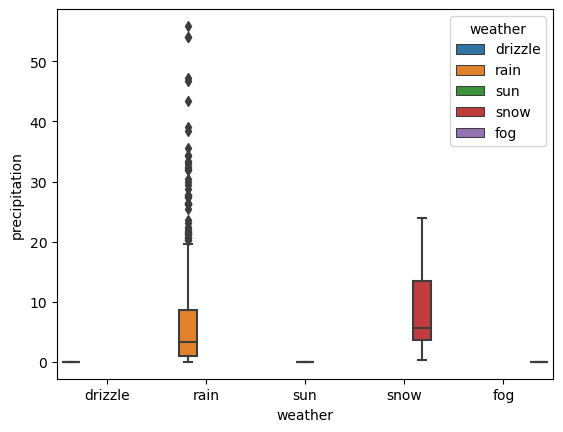

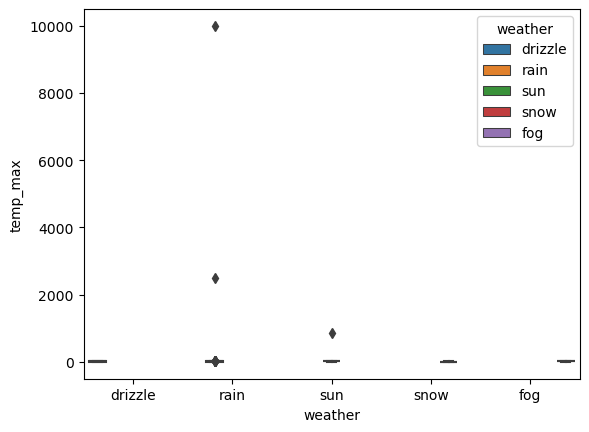

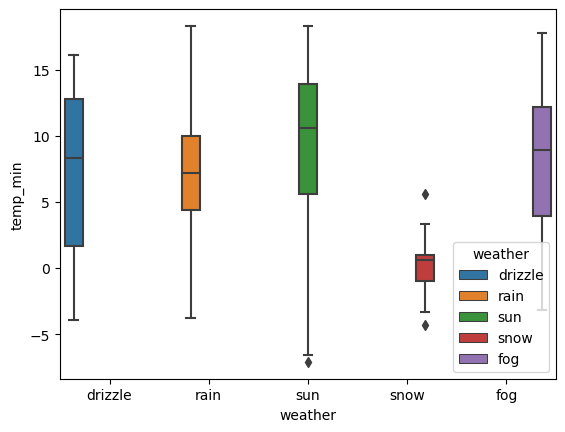

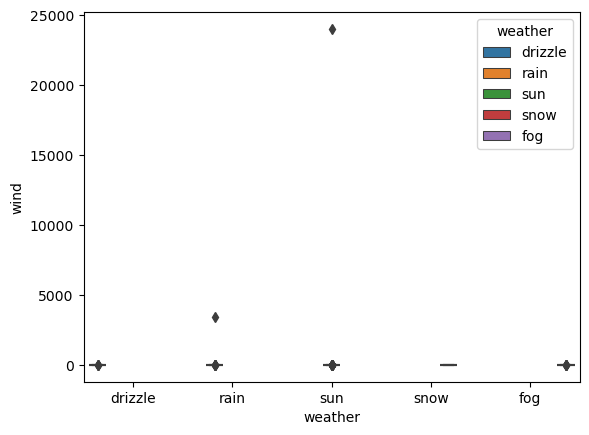

In [16]:
# Boxplot to identify Outliers

for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,y=i,x="weather",width=0.9,hue="weather")
    plt.show()

**Boxplots are created for each numerical column in the dataset, grouped by the `weather` condition, to visualize data distribution and detect outliers. This method helps to identify anomalies and understand the spread of numerical data across different weather conditions.**

# ***6.Data Cleaning and preprocessing***
 - To prepare the dataset for analysis by addressing issues such as missing values, outliers, and inconsistencies, ensuring data quality and accuracy.

## -**Missing value Treatment**
 - To address and handle missing data in the dataset by applying methods such as imputation or removal, ensuring completeness and reliability for accurate analysis.

In [17]:
# Missing values

data.isnull().sum()

precipitation    16
temp_max          0
temp_min         12
wind              0
weather           0
dtype: int64

- ***`precipitation`*** --> **16 missing values**
- ***`temp_min`*** --> **12 missing values**
- **The dataset has missing values in the `precipitation` and `temp_min` columns.**

In [18]:
# Using median for filling missed values

for i in ["precipitation","temp_min"]:
    data[i].fillna(data[i].median(),inplace=True)

In [19]:
data.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

**The code fills missing values in the `precipitation` and `temp_min` columns by replacing them with the median value of each column:**

- ***`precipitation`***-->  Missing values are filled with the `median value of the precipitation` column.
- ***`temp_min`*** --> Missing values are filled with the `median value of the temp_min` column.

**This approach helps maintain the central tendency of the data while handling missing values.**


## -**Outlier Treatment**
 - To identify and address outliers in the dataset by methods such as removal or transformation, ensuring that they do not skew or distort the analysis.

In [20]:
# Removing outliers

# Create function 

def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw 

**The code removes outliers from the numerical columns (`precipitation`, `temp_max`, `temp_min`, `wind`) using the interquartile range (IQR) method:**

- **Define the `whisker` function**: **Calculates the lower and upper bounds for outliers using the IQR method.**

In [21]:
data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [22]:
# Call whisker function to check

whisker(data['precipitation'])

(-4.199999999999999, 6.999999999999999)

In [23]:
# Use all numeric values to remove outliers

for i in ['precipitation', 'temp_max', 'temp_min', 'wind']:
    lw,uw=whisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

**Remove outliers**:
- **Apply the `whisker` function to each numeric column and replace values outside the bounds with the corresponding boundary value.**

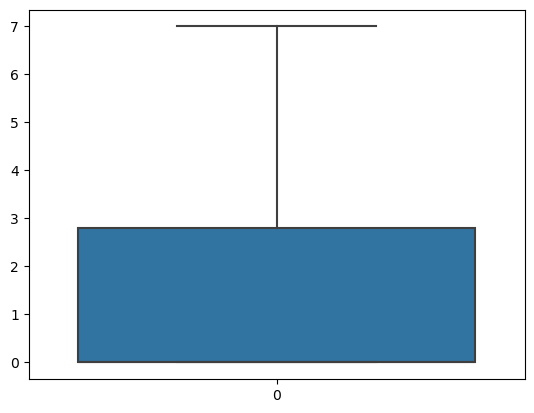

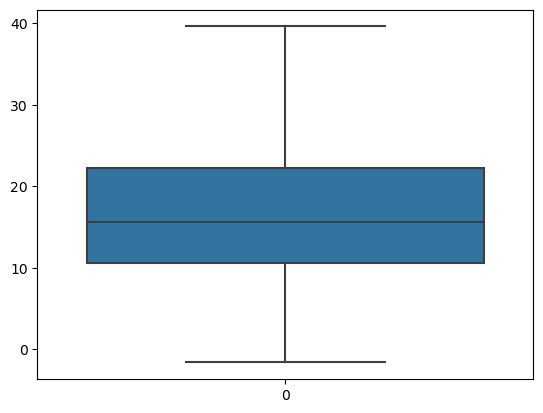

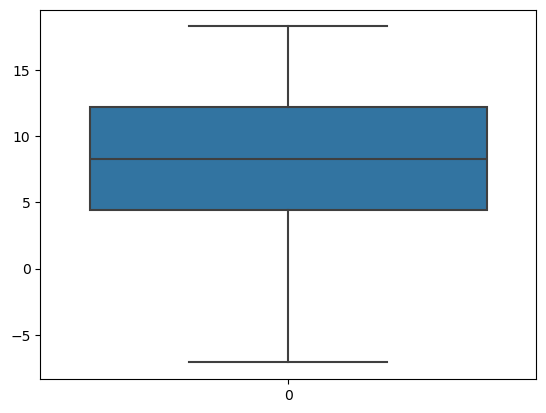

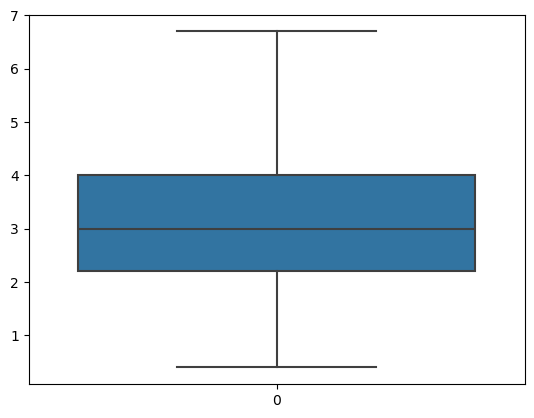

In [24]:
# Visualize boxplot to check

for i in ['precipitation', 'temp_max', 'temp_min', 'wind']:
    sns.boxplot(data[i])
    plt.show()

**Visualize the results**: 
- **Use boxplots to check the distribution of data after outlier removal.**

## -**Duplicate values Treatment**
 - To identify and remove duplicate records in the dataset, ensuring data integrity and accuracy for reliable analysis.

In [25]:
# Check number of duplicates before
print(f"Number of duplicate rows before: {data.duplicated().sum()}")

# Drop duplicates
data_cleaned = data.drop_duplicates()

# Check number of duplicates after
print(f"Number of duplicate rows after: {data_cleaned.duplicated().sum()}")

# View the cleaned data
print(data_cleaned)

Number of duplicate rows before: 11
Number of duplicate rows after: 0
      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1               7.0      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3               7.0      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            7.0       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1450 rows x 5 columns]


1. **Checking Number of Duplicate Rows Before Removal**:
   The dataset initially had 11 duplicate rows: 
   -  print(f"Number of duplicate rows before: {data.duplicated().sum()}")

2. **Removing Duplicate Rows**:
   Duplicate rows were removed from the dataset, resulting in a cleaned DataFrame:
   - data_cleaned = data.drop_duplicates()

3. **Checking Number of Duplicate Rows After Removal**:
   After removing duplicates, the dataset no longer contains any duplicate rows:
     - print(f"Number of duplicate rows after: {data_cleaned.duplicated().sum()}")

4. **Viewing the Cleaned Data**:
   The cleaned DataFrame, which now contains 1450 rows and 5 columns, is displayed:
    - print(data_cleaned)

- **The process successfully removed all duplicate rows from the dataset, resulting in a clean dataset with 1450 unique rows. The dataset columns include `precipitation`, `temp_max`, `temp_min`, `wind`, and `weather`.**


## -**Encoding**
 -  To convert categorical data into numerical format, enabling the use of machine learning algorithms and statistical analysis that require numerical inputs.

In [26]:
print(data.dtypes)

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


**The dataset contains the following columns with their respective data types:**

- ***`precipitation`*** --> **float64**
- ***`temp_max`***--> **float64**
- ***`temp_min`*** -->**float64**
- ***`wind`*** --> **float64**
- ***`weather`*** -->**object**

**The dataset consists of numerical columns (`float64`) for measurements and a categorical column (`object`) for weather conditions.**

In [27]:
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [28]:
# Apply one-hot encoding to the weather column

data_encoded = pd.get_dummies(data, columns=['weather'], drop_first=False)
print(data_encoded.head())

   precipitation  temp_max  temp_min  wind  weather_drizzle  weather_fog  \
0            0.0      12.8       5.0   4.7             True        False   
1            7.0      10.6       2.8   4.5            False        False   
2            0.8      11.7       7.2   2.3            False        False   
3            7.0      12.2       5.6   4.7            False        False   
4            1.3       8.9       2.8   6.1            False        False   

   weather_rain  weather_snow  weather_sun  
0         False         False        False  
1          True         False        False  
2          True         False        False  
3          True         False        False  
4          True         False        False  


- **One-hot encoding is applied to the `weather` column to convert categorical values into binary (0 or 1) columns.**
- **The resulting DataFrame, `data_encoded`, includes the original numerical columns and new binary columns for each weather condition.**
1. ***`weather_drizzle`*** --> Binary column indicating **drizzle (1 for presence, 0 for absence).**
2. ***`weather_fog`*** --> Binary column indicating **fog (1 for presence, 0 for absence).**
3. ***`weather_rain`*** --> Binary column indicating **rain (1 for presence, 0 for absence).**
4. ***`weather_snow`*** --> Binary column indicating **snow (1 for presence, 0 for absence).**
5. ***`weather_sun`*** --> Binary column indicating **sun (1 for presence, 0 for absence).**
   - **But it is present in Boolean values(False or True), have to change them to integers**

  


In [29]:
# Convert boolean to integers
data_encoded = data_encoded.apply(lambda x : x.astype(int) if x.dtype == 'bool' else x)

print(data_encoded.dtypes)
print(data_encoded.head())

precipitation      float64
temp_max           float64
temp_min           float64
wind               float64
weather_drizzle      int32
weather_fog          int32
weather_rain         int32
weather_snow         int32
weather_sun          int32
dtype: object
   precipitation  temp_max  temp_min  wind  weather_drizzle  weather_fog  \
0            0.0      12.8       5.0   4.7                1            0   
1            7.0      10.6       2.8   4.5                0            0   
2            0.8      11.7       7.2   2.3                0            0   
3            7.0      12.2       5.6   4.7                0            0   
4            1.3       8.9       2.8   6.1                0            0   

   weather_rain  weather_snow  weather_sun  
0             0             0            0  
1             1             0            0  
2             1             0            0  
3             1             0            0  
4             1             0            0  


**The code converts boolean columns in the `data_encoded` DataFrame to integer data types. This transformation is performed to prepare the data for machine learning algorithms, which typically require numerical input.**

**Data Types After Conversion:**

- **`precipitation`** --> float64
- **`temp_max`** --> float64
- **`temp_min`** --> float64
- **`wind`** -->`float64`
- **`weather_drizzle`** --> int32
- **`weather_fog`** -->  int32
- **`weather_rain`** --> int32
- **`weather_snow`** --> int32
- **`weather_sun`** --> int32
- 
**Resulting DataFrame:**

The DataFrame now includes integer columns for weather conditions:

- **`weather_drizzle`**: Integer column **(0 or 1) for drizzle.**
- **`weather_fog`**: Integer column **(0 or 1) for fog.**
- **`weather_rain`**: Integer column **(0 or 1) for rain.**
- **`weather_snow`**: Integer column **(0 or 1) for snow.**
- **`weather_sun`**: Integer column **(0 or 1) for sun.**

**This conversion ensures that all columns are in a numerical format suitable for machine learning models.**


In [30]:
# Display data_encoded dataframe

data_encoded.head()

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,0,0,0,0
1,7.0,10.6,2.8,4.5,0,0,1,0,0
2,0.8,11.7,7.2,2.3,0,0,1,0,0
3,7.0,12.2,5.6,4.7,0,0,1,0,0
4,1.3,8.9,2.8,6.1,0,0,1,0,0


## -**Normalization**
 - To scale numeric data to a standard range, improving the performance and convergence of machine learning algorithms by ensuring that features contribute equally.

In [31]:
# import sklearn library

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['precipitation', 'temp_max', 'temp_min', 'wind']

scaler =  MinMaxScaler()

data[columns_to_normalize ] = scaler.fit_transform(data[columns_to_normalize])

print(data[columns_to_normalize].head())
print(data[columns_to_normalize].min())
print(data[columns_to_normalize].max())

   precipitation  temp_max  temp_min      wind
0       0.000000  0.349515  0.476378  0.682540
1       1.000000  0.296117  0.389764  0.650794
2       0.114286  0.322816  0.562992  0.301587
3       1.000000  0.334951  0.500000  0.682540
4       0.185714  0.254854  0.389764  0.904762
precipitation    0.0
temp_max         0.0
temp_min         0.0
wind             0.0
dtype: float64
precipitation    1.0
temp_max         1.0
temp_min         1.0
wind             1.0
dtype: float64


**In the code, the sklearn library is used specifically for data normalization through Min-Max scaling:**

1. ***`Normalization`*** ----> **The MinMaxScaler from sklearn.preprocessing is used to normalize numerical features to a range between `0 and 1`. This is essential for many machine learning algorithms, which perform better or converge faster when features are on a similar scale.**

2. ***`MinMaxScaler`*** ----> **Scales the specified columns (precipitation, temp_max, temp_min, wind) to a range between `0 and 1`. This process ensures that all numerical features are on the same scale, which is crucial for improving the performance and convergence of many machine learning algorithms.**


# ***7.Correlation***
 -  To measure and visualize the strength and direction of relationships between numeric variables, aiding in understanding how variables interact with one another.

In [32]:
# correlation matrix
# Assuming the dataframe as data_encoded 

correlation_matrix=data_encoded.corr()
print(correlation_matrix)

                 precipitation  temp_max  temp_min      wind  weather_drizzle  \
precipitation         1.000000 -0.333889 -0.131335  0.355887        -0.124274   
temp_max             -0.333889  1.000000  0.859101 -0.160922        -0.014770   
temp_min             -0.131335  0.859101  1.000000 -0.062822        -0.044473   
wind                  0.355887 -0.160922 -0.062822  1.000000        -0.120121   
weather_drizzle      -0.124274 -0.014770 -0.044473 -0.120121         1.000000   
weather_fog          -0.174556  0.009803 -0.013985 -0.146470        -0.052872   
weather_rain          0.658474 -0.353882 -0.112654  0.260825        -0.171537   
weather_snow          0.161501 -0.198235 -0.218330  0.113862        -0.026115   
weather_sun          -0.565540  0.407320  0.194763 -0.171054        -0.171299   

                 weather_fog  weather_rain  weather_snow  weather_sun  
precipitation      -0.174556      0.658474      0.161501    -0.565540  
temp_max            0.009803     -0.353882   

- **The correlation matrix shows the pairwise correlations between numerical features and encoded weather conditions in the dataset.** 
- **Correlation values range from `-1 to 1`, where `1` indicates a `perfect positive correlation`,**
- **`-1` indicates a `perfect negative correlation`, and**
- **`0` indicates `no correlation`.**

## -**Heatmap**

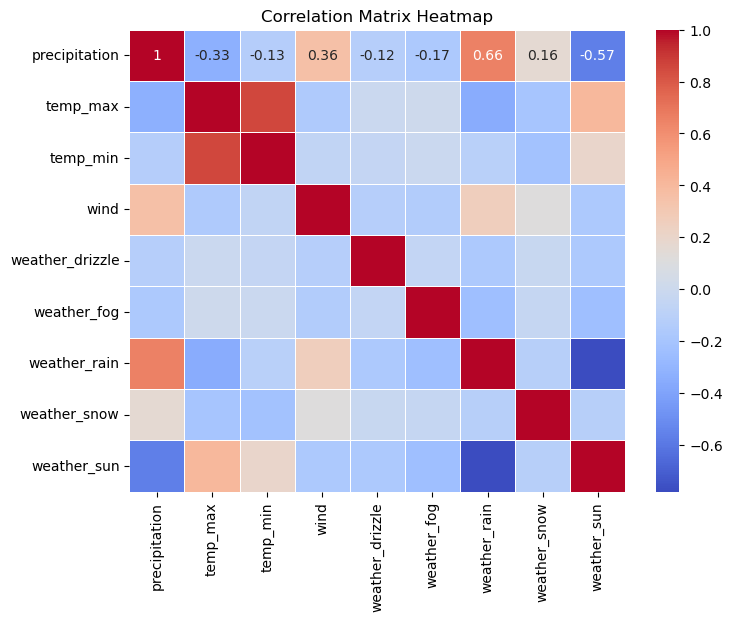

In [33]:
# Heatmap to visualize the correlation
# Correlation analysis to identify relationship between parameters

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,cmap='coolwarm',linewidths=0.5,annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**The `sns.heatmap()` function with the `annot=True` parameter creates a heatmap of the correlation matrix , where the correlation coefficients are displayed as annotations within the heatmap cells.**

- ***`Color Intensity`***-----> **The color intensity represents the strength of the correlation, with `darker colors indicating stronger correlations`.**
- ***`Annotations`*** -----> **The numeric values inside the heatmap cells show the exact correlation coefficients between pairs of features.**
- ***`Correlation Insights`*** -----> **This visualization provides a clear, visual representation of the correlations between numerical features, making it easier to identify strong or weak relationships.**

**This heatmap is useful for quickly assessing feature relationships and understanding how different variables are interrelated in the dataset.**

## **-Interpretation**
- ***`precipitation`***: Shows a moderate **positive correlation with `weather_rain` (0.658)** and a **negative correlation with `weather_sun` (-0.566).**
- ***`temp_max`***: Highly **positively correlated with `temp_min` (0.859)** and **negatively correlated with `weather_rain` (-0.354).**
- ***`temp_min`***: Positively **correlated with `temp_max` (0.859)** and **negatively correlated with `weather_rain` (-0.113).**
- ***`wind`***: Shows a **positive correlation with `weather_rain` (0.261)** and a **negative correlation with `weather_sun` (-0.171).**
- ***Encoded Weather Columns***: Exhibit varying degrees of correlation with numerical features,
  
- **`weather_rain` and `weather_sun` showing strong correlations with other features.**


# ***8.Regression Analysis***
 -  To model and understand the relationship between dependent and independent variables, predicting outcomes and identifying trends based on the data.

## -**Import Libraries:**
1. ***train_test_split*** - Splits the dataset into training and testing sets for model evaluation.
2. ***LinearRegression*** - Applies linear regression to model relationships between variables.
3. ***mean_squared_error, r2_score*** -  Evaluates model performance using prediction accuracy and variance explanation.


In [34]:
# import necessary libraries for regression analysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
data_encoded.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather_drizzle',
       'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun'],
      dtype='object')

In [36]:
# Assuming the dataframe as data_encoded 
# Define target and features

# Target variable Precipitation(y)
# Features variable reamaining columns except precipitation(X)

X = data_encoded[['temp_max', 'temp_min', 'wind', 'weather_drizzle',
       'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']]
y = data_encoded['precipitation']

**In the `data_encoded` DataFrame:**

- ***Target Variable (`y`)*** --> `precipitation`
- **This is the variable, aim to predict or model.**

- ***Feature Variables (`X`)***: 
- **These are the predictors or independent variables used to build the model. They include:**
    - `temp_max`
    - `temp_min`
    - `wind`
    - `weather_drizzle`
    - `weather_fog`
    - `weather_rain`
    - `weather_snow`
    - `weather_sun`

- ***`X`***---> **Contains all the columns `except` `precipitation`. It includes numerical and one-hot encoded categorical features.**
- ***`y`***---> **Contains only the `precipitation` column, which is the target variable to predict.**

**This separation of features and target variable is crucial for training predictive models.**

In [37]:
# Split the data
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

**The dataset was divided into training and testing sets using the `train_test_split` function from scikit-learn:**

- ***Training Set (`X_train`, `y_train`)***:
  - **Contains `80%` of the data used to train the model.**
- ***Testing Set (`X_test`, `y_test`)***:
  - **Contains `20%` of the data used to evaluate the model's performance.**
 
- ***`X_train`*** --> **Features for the training set.**
- ***`X_test`***--> **Features for the testing set.**
- ***`y_train`*** --> **Target variable for the training set.**
- ***`y_test`***:] --> **Target variable for the testing set.**
- ***`test_size=0.2`*** --> **Specifies that 20% of the data is reserved for testing.**
- ***`random_state=42`*** --> **Ensures reproducibility of the split by setting a fixed random seed.**

In [38]:
# Create and train the regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Model Creation and Training**

**A Linear Regression model was created and trained using the training data:**

- ***`Model`***--> **Linear Regression**
- ***`Training Process`***--> **The model was trained on the training set (`X_train`, `y_train`).**

- ***`LinearRegression()`***--> **Initializes the Linear Regression model.**
- ***`model.fit(X_train, y_train)`***--> **Trains the model using the training feature set (`X_train`) and target variable (`y_train`).**

**This step fits the linear regression model to the training data, allowing it to learn the relationship between the features and the target variable.**

In [39]:
y_prediction = model.predict(X_test)

In [40]:
# Evaluate the model

mse = mean_squared_error(y_test,y_prediction)
r2= r2_score(y_test, y_prediction)

print(f"Mean Squared Error: {mse}")
print(f"R Squared: {r2}")

Mean Squared Error: 3.072103754948882
R Squared: 0.5079668416992722


**Model Evaluation**

**The performance of the trained Linear Regression model was assessed using the testing data:**

- ***`Predictions`*** --> **The model's predictions on the test set were obtained.**
- ***`Evaluation Metrics`***
  - ***`Mean Squared Error (MSE)`*** --> **Measures the average squared difference between the actual and predicted values.**
  - ***`R Squared (R²)`***--> **Represents the proportion of variance in the target variable that is predictable from the features.**


# ***9.Visualization***
 -  To graphically represent data patterns and relationships, making it easier to interpret and communicate insights from the dataset.

C:\Users\AAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


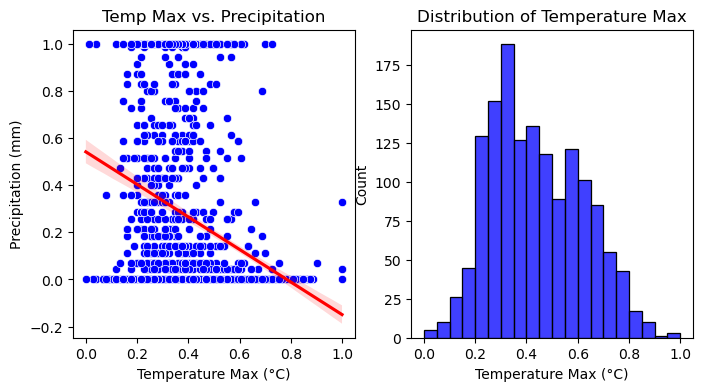

In [44]:
# visualize the relationships between temp_max, temp_min, wind, and precipitation

# Temp Max vs. Precipitation
# Scatter plot for temp_max vs precipitation
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['temp_max'], y=data['precipitation'], color='blue')
sns.regplot(x=data['temp_max'], y=data['precipitation'], scatter=False, color='red')
plt.xlabel('Temperature Max (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temp Max vs. Precipitation')

# Histogram of temp_max
plt.subplot(1, 2, 2)
sns.histplot(data['temp_max'], color='blue', bins=20)
plt.xlabel('Temperature Max (°C)')
plt.title('Distribution of Temperature Max')
plt.show()

**visualizations were created to explore the relationships between `temp_max`, `temp_min`, `wind`, and `precipitation`:**

1. ***Temp Max vs. Precipitation***:
   - **A scatter plot with a regression line to show the relationship between `temp_max` and `precipitation`.**
   - ***`Scatter Plot`*** -----> **Displays individual data points for `temp_max` and `precipitation`.**
   - ***`Regression Line`*** ----->**Added to show the trend in the data.**

2. ***Distribution of Temperature Max***:
   - **A histogram to show the distribution of `temp_max`.**

C:\Users\AAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


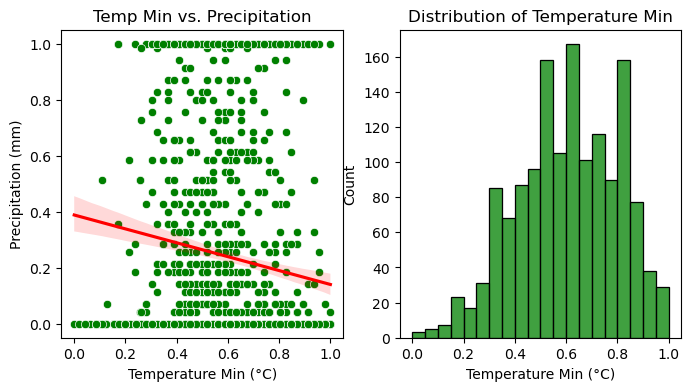

In [45]:
#Temp Min vs. Precipitation
# Scatter plot for temp_min vs precipitation
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['temp_min'], y=data['precipitation'], color='green')
sns.regplot(x=data['temp_min'], y=data['precipitation'], scatter=False, color='red')
plt.xlabel('Temperature Min (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temp Min vs. Precipitation')

# Histogram of temp_min
plt.subplot(1, 2, 2)
sns.histplot(data['temp_min'], color='green', bins=20)
plt.xlabel('Temperature Min (°C)')
plt.title('Distribution of Temperature Min')
plt.show()

1. ***Temp Min vs. Precipitation***:
   - **A scatter plot with a regression line to illustrate the relationship between `temp_min` and `precipitation`.**
   - ***`Scatter Plot`*** -----> **Displays the data points for `temp_min` against `precipitation`.**
   - ***`Regression Line`*** -----> **Shows the trend or correlation between `temp_min` and `precipitation`.**

2. ***Distribution of Temperature Min***:
   - **A histogram to show the distribution of `temp_min` values.**


C:\Users\AAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


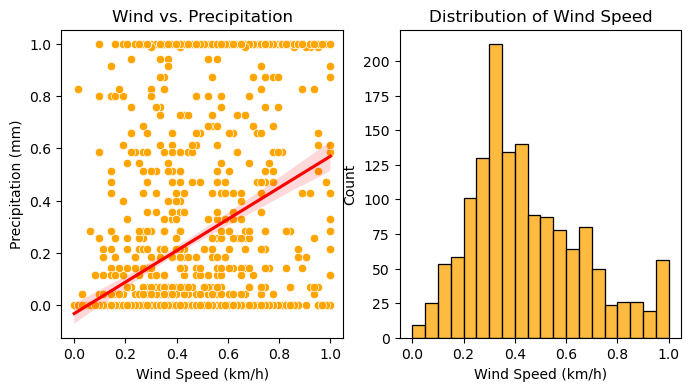

In [46]:
#Wind vs. Precipitation
# Scatter plot for wind vs precipitation
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['wind'], y=data['precipitation'], color='orange')
sns.regplot(x=data['wind'], y=data['precipitation'], scatter=False, color='red')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Precipitation (mm)')
plt.title('Wind vs. Precipitation')

# Histogram of wind
plt.subplot(1, 2, 2)
sns.histplot(data['wind'], color='orange', bins=20)
plt.xlabel('Wind Speed (km/h)')
plt.title('Distribution of Wind Speed')
plt.show()

1. ***Wind Speed vs. Precipitation***:
   - **A scatter plot with a regression line to illustrate the relationship between `wind` and `precipitation`.**
   - ***`Scatter Plot`***---->  **Displays the data points for `wind` against `precipitation`.**
   - ***`Regression Line`***----> **Shows the trend or correlation between `wind` and `precipitation`.**

2. ***Distribution of Wind Speed***:
   - **A histogram to show the distribution of `wind` speed values.**

# **Conclution**

This project analyzed a weather dataset to study precipitation patterns. Key steps included:

1. **Data Cleaning**: Handled missing values, removed duplicates, and addressed outliers.
2. **Feature Engineering**: Applied one-hot encoding for categorical variables and normalized numerical features.
3. **Exploratory Data Analysis (EDA)**: Conducted correlation analysis and visualized relationships using scatter plots and histograms.
4. **Model Building**: Created a Linear Regression model to predict precipitation, achieving a Mean Squared Error of 3.07 and an R-squared value of 0.51.

The analysis provided insights into how temperature and wind affect precipitation, with visualizations supporting the findings.

# ***Submitted by:*** **`Aarthy SM`**